In [127]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt

In [60]:
def descargarDatos():
    df = pd.read_excel('Output//Blind_long.xlsx', sheetname='Sheet1')
    meses = df['Mes'].unique()

    pandas = []
    long = 0
    for i in range(1, len(meses)):
        pandas.append(df.loc[df['Mes'] == meses[i]])

    mes_wide = df.loc[df['Mes']==meses[0]]

    mes_name = mes_wide.rename(columns={"Produccion": meses[0]})
    data = mes_name.drop(columns='Mes')

    for i in range(0, len(pandas)):
        dat = pandas[i]
        data[meses[i+1]] = dat['Produccion'].values
        
    return data
    



In [190]:
def PuntoUnoBlind(df):
    d26 = df.loc[df['Campo'] == '1f d2689f']
    d26a = df.loc[df['Campo'] == '1fd2689f']
    #d26_2019 = d26.loc[d26['Year'] == 2019]
    #d26a_2019 = d26a.loc[d26a['Year']==2019]
    #print(d26_2019)
    #print(d26a_2019)
    #return('Total: ', d26_2019['Julio'].values[0]+d26a_2019['Julio'].values[0])
    l=[d26,d26a]
    base= pd.concat(l,axis=0, join='outer')
    print ('Total: ', sum(base["Julio"].loc[base["Year"]==2019]))
    respuesta = base.loc[base["Year"]==2019]
    plt.rcParams['figure.figsize'] = [15, 7]
    plt.figure()
    plt.ylabel("MMstb")
    ax=plt.bar(respuesta.iloc[:,7:].columns, respuesta.iloc[:,7:].sum(axis=0))
    for bar in ax.patches:
        bar.set_facecolor('#888888')
    ax.patches[6].set_facecolor('#aa3333')
    return respuesta

Total:  4819.4182845493315


,Campo,Year,Departamento,Municipio,Empresa,Cuenca,Contrato,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,1f d2689f,2019,cf33cb8a,cf33cb8a,d5580f74,0,1f d2689f,7897.993261,6687.201142,6176.648164,5998.336864,5838.96917,6390.660871,4766.241346,5871.527810,5179.292397,5928.18463,6237.904951,6226.606211
108,1fd2689f,2019,cf33cb8a,102a28a6,d5580f74,0,1f d2689f,128.385875,147.155486,148.145077,117.880983,96.26222,97.295310,53.176938,86.649048,76.263776,95.97948,94.500530,95.131259


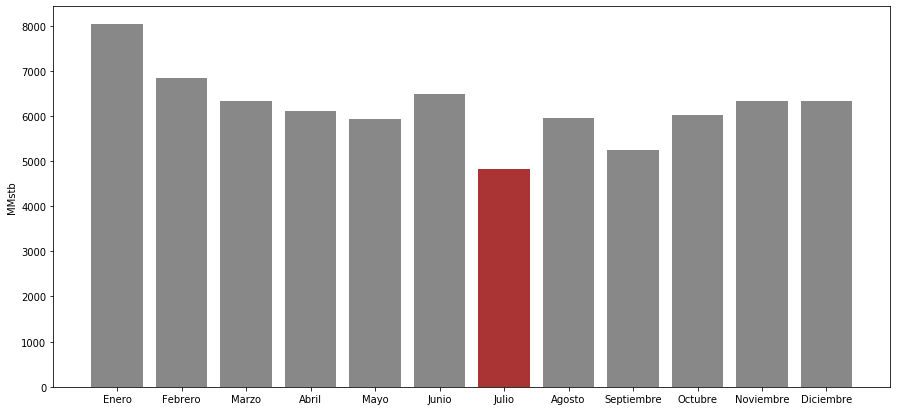

In [191]:
df = descargarDatos()
PuntoUnoBlind(df)

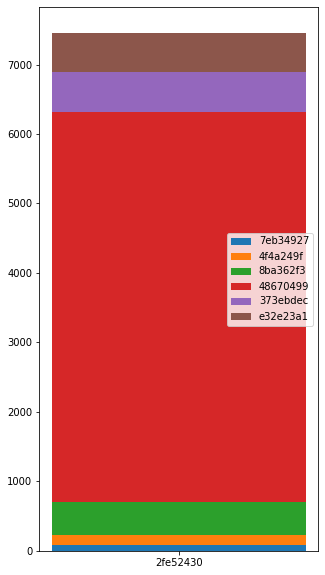

In [164]:
def PuntoDosBlind(df):
    fe = df.loc[df['Empresa'] == '2fe52430']
    
    fe_52 = fe.loc[fe['Year'] == 2019]
    width=0.35
    s = 0
    plt.rcParams['figure.figsize'] = [5, 10]
    plt.figure()
    for i in range(len(fe_52)):
        febrero = fe_52['Febrero'].values[i]
        labels = fe_52['Campo'].values[i]
        plt.bar('2fe52430', febrero, width, bottom=s, label = labels)
        s= s+ febrero
    plt.legend()
    plt.show()
    
    
PuntoDosBlind(df)

[623608.4325261028, 126069.16533849256, 98767.6693859927]


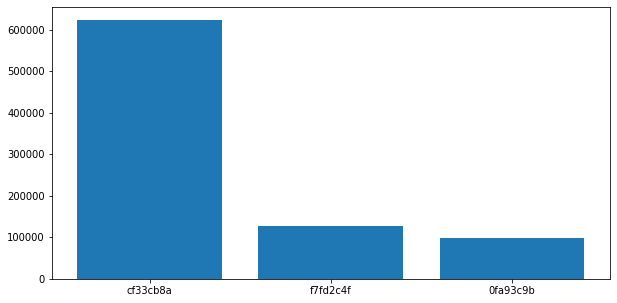

In [146]:
def puntoTresBlind(df):
    total = df['Enero']+df['Febrero']+df['Marzo']+df['Abril']+df['Mayo']+df['Junio']+df['Julio']+df['Agosto']+df['Septiembre']+df['Octubre']+df['Noviembre']+df['Diciembre']
    df['total'] = total
    year2018 = df.loc[df['Year']==2018]
    departamentos = df['Departamento'].unique()
    x = []
    totalDep = []
    for i in range(0, len(departamentos)):
        departamento = year2018.loc[year2018['Departamento'] == departamentos[i]]
        if departamento['total'].sum() != 0:
            totalDep.append(departamento['total'].sum())
            x.append(departamentos[i])

    print(totalDep)
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.figure()
    plt.bar(x,totalDep)
    plt.show()
#Varias Barras cada una por departamento
puntoTresBlind(df)

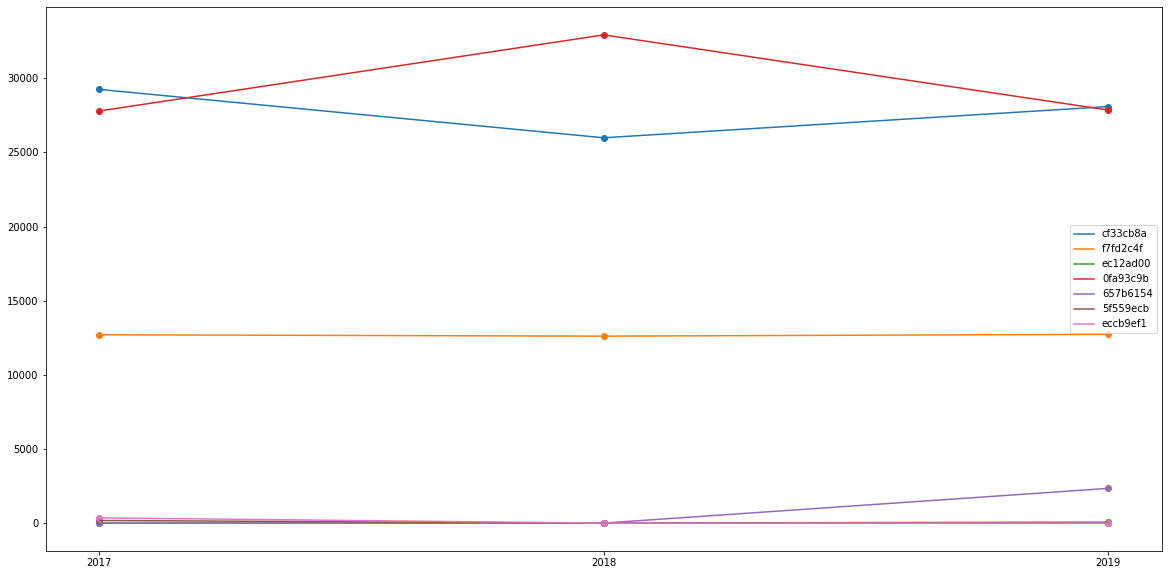

In [141]:
def puntoCuatroBlind(df):
    total = df['Enero']+df['Febrero']+df['Marzo']+df['Abril']+df['Mayo']+df['Junio']+df['Julio']+df['Agosto']+df['Septiembre']+df['Octubre']+df['Noviembre']+df['Diciembre']
    df['total'] = total
    departamentos = df['Departamento'].unique()
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.figure()
    for i in range(len(departamentos)):
        departamento = df.loc[df['Departamento']==departamentos[i]]
        year = [2017,2018,2019]
        promedio =[]
        for s in range(0,len(year)):
            depYear = departamento.loc[departamento['Year']==year[s]]
        
            campo = depYear['Campo'].unique()
            suma = depYear['total'].sum()
            if len(campo) == 0:
                promedio.append(0)
            else:
                promedio.append(suma/len(campo))
        year = ['2017','2018','2019']      
        plt.plot(year,promedio, label= departamentos[i])
        
        plt.scatter(year, promedio)
    plt.legend()
    plt.show()
    
puntoCuatroBlind(df)    

In [124]:
def puntoQuintoBlind(df):
    total = df['Enero']+df['Febrero']+df['Marzo']+df['Abril']+df['Mayo']+df['Junio']+df['Julio']+df['Agosto']+df['Septiembre']+df['Octubre']+df['Noviembre']+df['Diciembre']
    df['total'] = total
    campo = df.loc[df['Campo'] == '51cbb05d']
    #Tasa declinacion D = (dq/dt)/q 
    #Tasa declinacion D = ln(qi/q)/(T-Ti)
    promedio = campo['total'].sum()/36
    enero = campo.loc[campo['Year']==2017]
    final = campo.loc[campo['Year']==2019]
    adentro = enero['Enero'].value[0]/final['Diciembre'].value[0]
    afuera = 36-1
    D = np.log(adentro)/afuera
    print(D)
puntoQuintoBlind(df)

         Campo  Year Departamento Municipio   Empresa  Cuenca  Contrato  \
408   51cbb05d  2019     f7fd2c4f  6feb5887  ffd6d24d       0  73dec126   
936   51cbb05d  2018     f7fd2c4f  6feb5887  ffd6d24d       0  73dec126   
1368  51cbb05d  2017     f7fd2c4f  6feb5887  ffd6d24d       0  e753d35d   

            Enero      Febrero        Marzo        Abril        Mayo  \
408    474.677576   533.531071   525.897081   582.869264  546.439256   
936    900.208843   916.847777   803.600038   707.503393  565.831526   
1368  1871.488651  1412.303663  1003.131949  1017.901566  789.848893   

           Junio       Julio      Agosto  Septiembre     Octubre   Noviembre  \
408   520.546763  487.216024  497.318555  520.688133  438.845672  353.186216   
936   481.854831  406.746221  390.432523  580.354325  525.230571  503.456920   
1368  646.097985  978.821890  836.364244  797.871564  703.378049  643.379328   

       Diciembre         total  
408   396.434617   5877.650227  
936   472.191495   7254